<a href="https://colab.research.google.com/github/sunnatillo91/ai-datascience/blob/main/Diabet_prediction_practice_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning

### Diabet kasalligiga tashxis qo'yish



In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/drive/MyDrive/praktikum_datasets/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##Vazifa

Quyidagi ma'lumotlar to'plami Hindistonning Qandli diabet va buyrak kasalliklari milliy institutidan olingan. Maqsad diagnostik o'lchovlar asosida bemorda diabet bor-yo'qligini taxmin qilishdir.


##Tarkib

Dataset ichida barcha bemorlar kamida 21 yoshli ayollari.

##Ustunlar

- Pregnancies: homilador bo'lish soni

- Glucose: glyukozaga test natijasi

- BloodPressure: diastolik qon bosimi (mm Hg)

- SkinThickness: Triceps teri burmasining qalinligi (mm)

- Insulin: 2 soatlik sarum insulini (mu U/ml)

- BMI: Tana massasi indeksi (vazn kg / (m bo'yi) ^ 2)

- DiabetesPedigreeFunction: diabetning naslchilik funktsiyasi

- Age: Yosh (yil)

- Outcome: Class (0 - diabet yo'q, 1 - diabet)

In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.081672,0.073535,0.017683,0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,0.113970,0.074752
Insulin,0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,0.113970,0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [6]:
df.corrwith(df['Outcome']).abs().sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
dtype: float64

## MLga tayyorlaymiz

In [7]:
X = df.drop('Outcome',axis=1).values
y = df['Outcome']

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

## ML

In [9]:
# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# k-NN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)  # k-ni qiymati

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [10]:
y_pred = knn.predict(X_test)

## Baholash
### Jaccard index

In [ ]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, y_pred)

0.4520547945205479

In [11]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, y_pred)

0.5454545454545454

###Confusion matrix

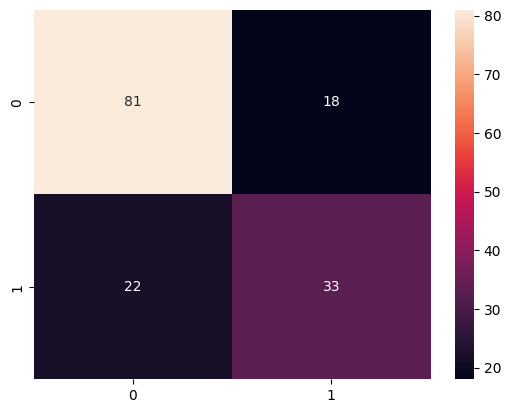

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()

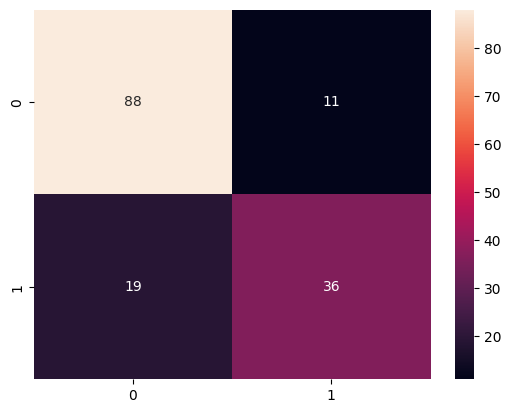

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()

In [ ]:
confusion_matrix(y_test, y_pred)

array([[81, 18],
       [22, 33]])

In [13]:
confusion_matrix(y_test, y_pred)

array([[88, 11],
       [19, 36]])

#Precision, recall, F1

In [ ]:
# 1-usul
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80        99
           1       0.65      0.60      0.62        55

    accuracy                           0.74       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154



In [14]:
# 1-usul
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85        99
           1       0.77      0.65      0.71        55

    accuracy                           0.81       154
   macro avg       0.79      0.77      0.78       154
weighted avg       0.80      0.81      0.80       154



In [ ]:
# 2-Usul
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision = precision_score(y_test, y_pred)
recall= recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"{precision=}\n{recall=}\n{f1_score=}\n{accuracy_score=}")

precision=0.6470588235294118
recall=0.6
f1_score=<function f1_score at 0x7e59ddf95870>
accuracy_score=<function accuracy_score at 0x7e59ddf95510>


In [15]:
# 2-Usul
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision = precision_score(y_test, y_pred)
recall= recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"{precision=}\n{recall=}\n{f1_score=}\n{accuracy_score=}")

precision=0.7659574468085106
recall=0.6545454545454545
f1_score=<function f1_score at 0x7efc44921120>
accuracy_score=<function accuracy_score at 0x7efc44920dc0>


### Cross validation yordamida tekshiramiz

In [ ]:
# Cross validation
from sklearn.model_selection import cross_val_predict
predict = cross_val_predict(estimator = knn, X=X, y=y, cv=5)

# Modelni baholash
from sklearn.metrics import classification_report
print("Classification report: \n", classification_report(y, predict))

Classification report: 
               precision    recall  f1-score   support

           0       0.78      0.83      0.80       500
           1       0.64      0.55      0.59       268

    accuracy                           0.73       768
   macro avg       0.71      0.69      0.70       768
weighted avg       0.73      0.73      0.73       768



In [16]:
# Cross validation
from sklearn.model_selection import cross_val_predict
predict = cross_val_predict(estimator = knn, X=X, y=y, cv=5)

# Modelni baholash
from sklearn.metrics import classification_report
print("Classification report: \n", classification_report(y, predict))

Classification report: 
               precision    recall  f1-score   support

           0       0.78      0.88      0.83       500
           1       0.71      0.54      0.61       268

    accuracy                           0.76       768
   macro avg       0.74      0.71      0.72       768
weighted avg       0.76      0.76      0.75       768



## Eng yaxshi k ni topish
### for yordamida

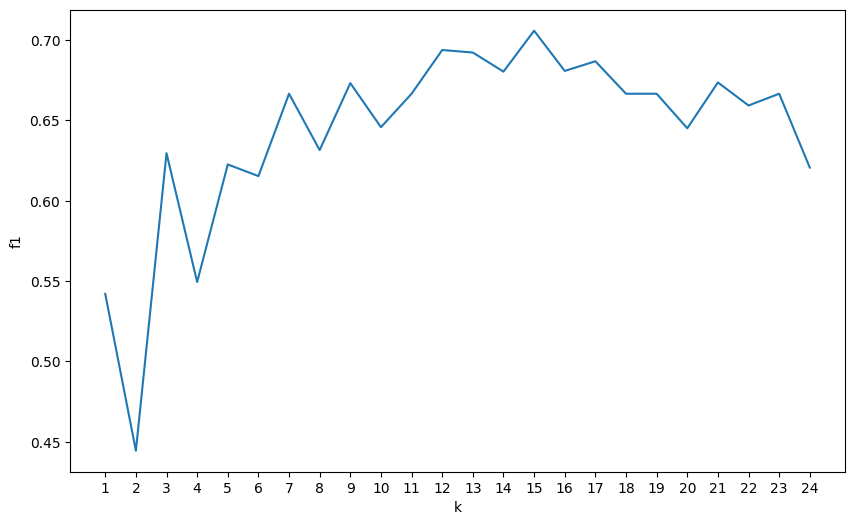

In [ ]:
f1 = []
for k in range(1,25):
  knn = KNeighborsClassifier(n_neighbors=k)  # k-ni qiymati
  knn.fit(X_train, y_train)
  y_predict = knn.predict(X_test)
  f1.append(f1_score(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,25), f1)
plt.xticks(range(1,25))
plt.xlabel('k')
plt.ylabel('f1')
plt.show()

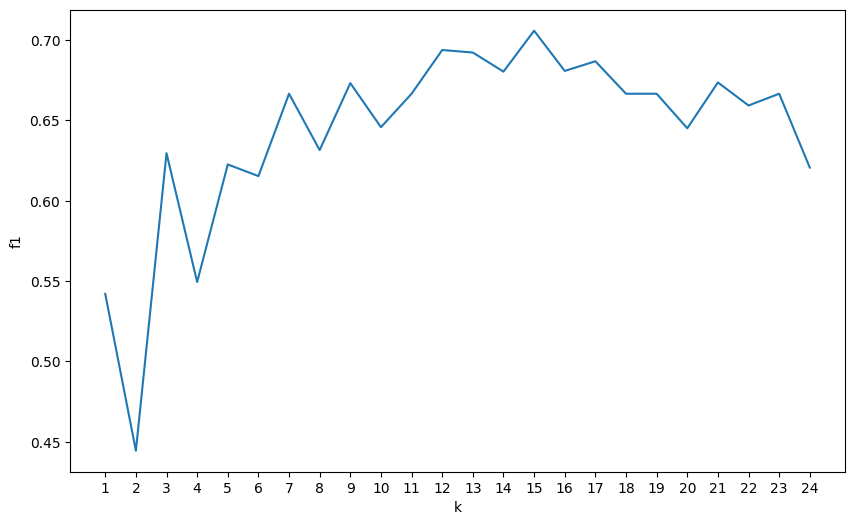

In [17]:
f1 = []
for k in range(1,25):
  knn = KNeighborsClassifier(n_neighbors=k)  # k-ni qiymati
  knn.fit(X_train, y_train)
  y_predict = knn.predict(X_test)
  f1.append(f1_score(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,25), f1)
plt.xticks(range(1,25))
plt.xlabel('k')
plt.ylabel('f1')
plt.show()

### Grid search yordamida

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 25)}
knn = KNeighborsClassifier()
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [ ]:
knn_gscv.cv_results_

{'mean_fit_time': array([0.00187197, 0.00179844, 0.00165672, 0.00157413, 0.00164757,
        0.00182748, 0.00185175, 0.00208669, 0.00201001, 0.00160489,
        0.0015923 , 0.00208254, 0.00201287, 0.00164819, 0.00226231,
        0.00166869, 0.00175266, 0.001548  , 0.00156107, 0.00175896,
        0.0019505 , 0.00186257, 0.00179138, 0.00170875]),
 'std_fit_time': array([4.01298532e-04, 1.67403761e-04, 4.04478788e-05, 1.82259114e-05,
        4.76814746e-05, 3.27210613e-04, 9.71946199e-05, 5.21479838e-04,
        4.54636727e-04, 3.61399157e-05, 3.27391684e-05, 9.99446457e-04,
        4.30174582e-04, 8.49577434e-05, 1.13065959e-03, 1.80492092e-04,
        2.49867785e-04, 4.39392957e-05, 5.17113575e-05, 4.24278776e-04,
        5.08979744e-04, 4.36465682e-04, 3.15031721e-04, 1.67336352e-04]),
 'mean_score_time': array([0.01170039, 0.01102014, 0.0110189 , 0.01074266, 0.0116663 ,
        0.01150503, 0.01210022, 0.0165916 , 0.01521192, 0.01097307,
        0.01196399, 0.01432352, 0.01280947, 0.01

In [ ]:
knn_gscv.cv_results_['rank_test_score']

array([24, 23, 15, 18, 22, 21, 17, 16, 20, 19, 14,  9,  4, 11,  3, 12,  1,
        6,  2,  8,  5, 10,  7, 13], dtype=int32)

In [ ]:
knn_gscv.best_params_  # k nechaga teng bo'lganda eng yaxshi natija chiqishi

{'n_neighbors': 17}

In [ ]:
knn_gscv.best_score_

0.968390001552554

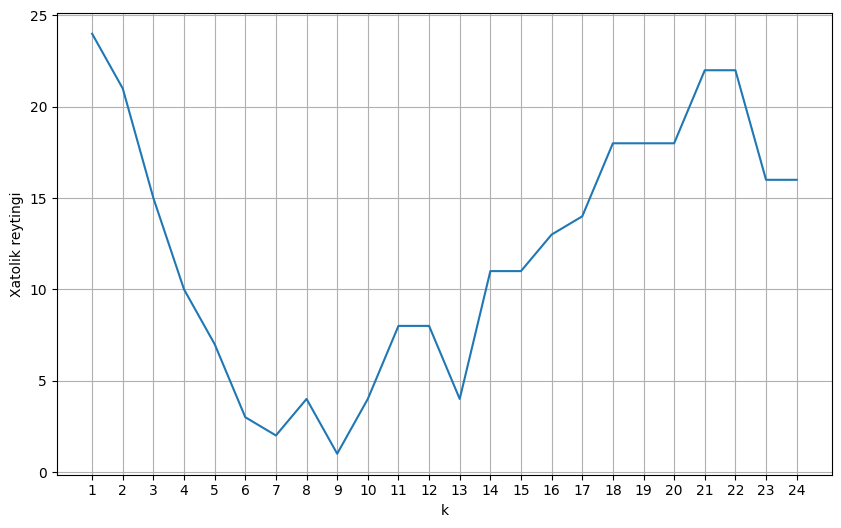

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(param_grid['n_neighbors'], knn_gscv.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel('k')
plt.ylabel('Xatolik reytingi')
plt.grid()
plt.show()